In [23]:
import matplotlib.pyplot as plt

import utils
import pandas as pd
import classifiers
import evaluations

In [13]:
df5s, df10s, df30s = utils.task4_df()

In [14]:
whole_df = pd.concat((df5s, df10s, df30s), ignore_index=True)

In [15]:
X_train, y_train, X_val, y_val = utils.train_val_split(whole_df)

In [16]:
y_val_pred = classifiers.tensorflow_fcnn(X_train, y_train, X_val, y_val)

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1947 - loss: 1.4452 - val_f1_score: 0.1956 - val_loss: 0.9458
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.5429 - val_f1_score: 0.1956 - val_loss: 0.9558
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.3245 - val_f1_score: 0.1957 - val_loss: 1.0282
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.2086 - val_f1_score: 0.1955 - val_loss: 1.0494
62/62 - 0s - 766us/step - f1_score: 0.1955 - loss: 1.0494
{'f1_score': <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.03092555, 0.05558619, 0.12711771, 0.13522187, 0.22458836,
       0.21545252, 0.23204662, 0.26628456, 0.32545355, 0.3423841 ],
      dtype=float32)>, 'loss': 1.049447774887085}


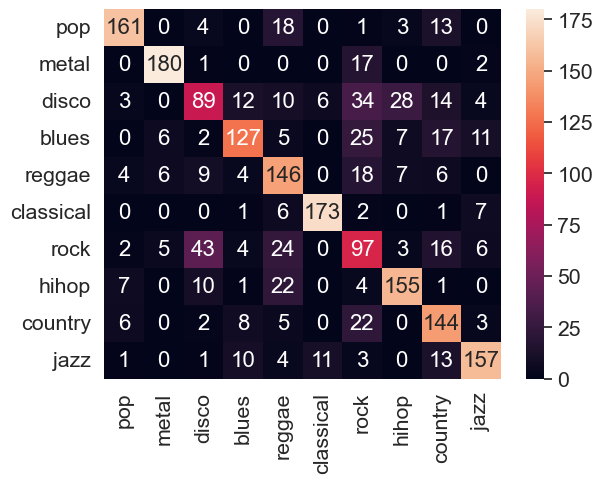

In [17]:
evaluations.conf_matrix(y_val_pred, y_val)

In [18]:
perf_dl =evaluations.multiclass_performance_metrics(y_val_pred, y_val, labels=utils.genreNames)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s


Accuracy : 0.6914141414141414


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


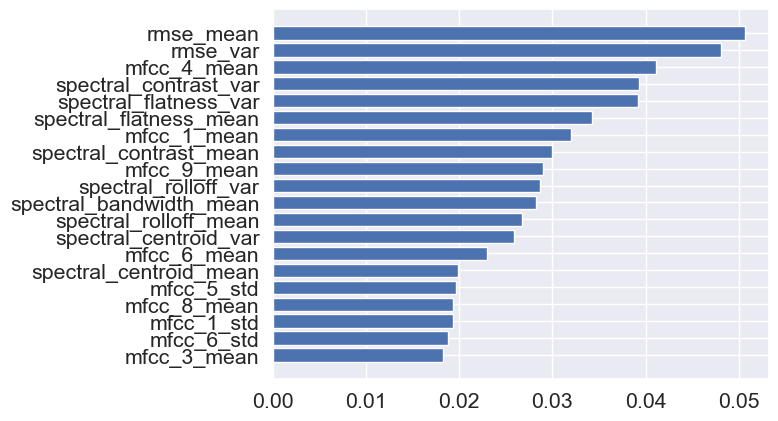

In [19]:
y_val_pred = classifiers.sklearn_rf(X_train, y_train, X_val, y_val)

The 4 most important features for the random forest are [rmse_mean, rmse_var, spectral_contrast_var, mfcc_4_mean]

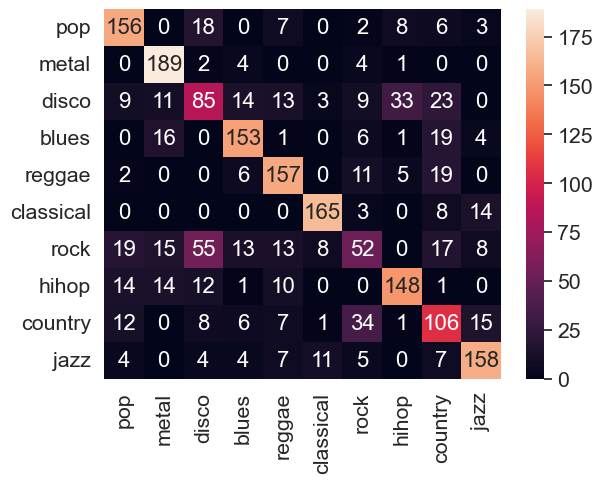

In [20]:
evaluations.conf_matrix(y_val_pred, y_val)

In [21]:
perf_rf = evaluations.multiclass_performance_metrics(y_val_pred, y_val)


Mean f1 score for deep learning : 0.7231641958116996
Mean f1 score for random forest : 0.682091471549658


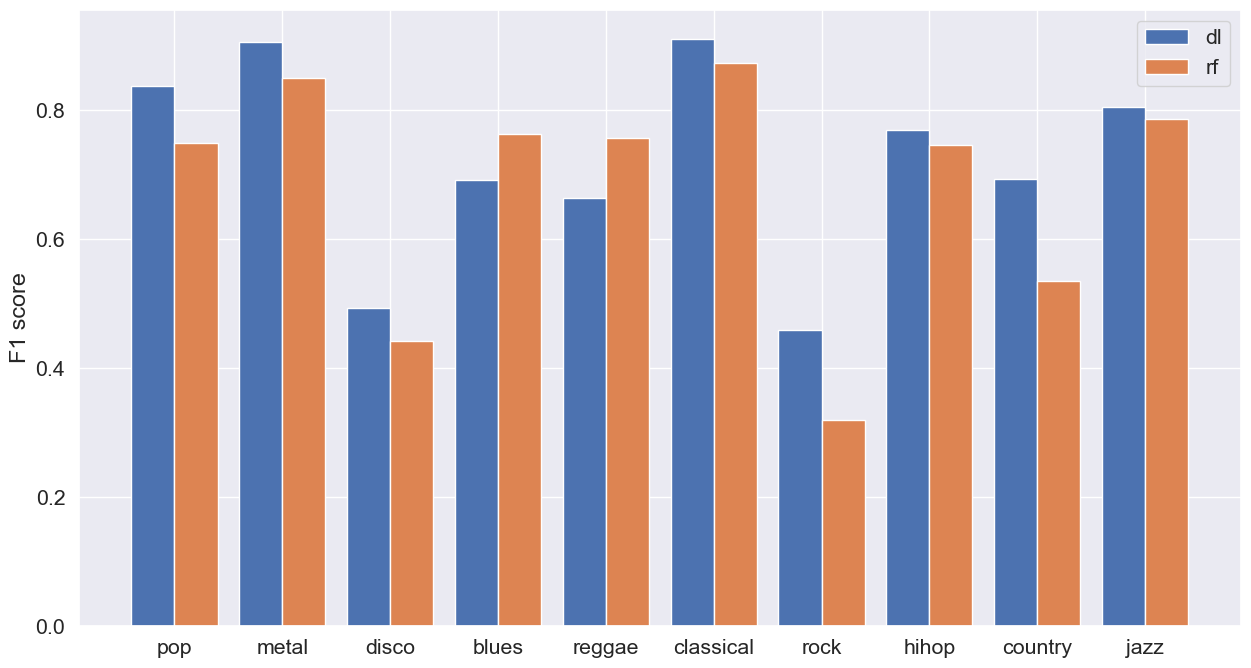

In [31]:
import numpy as np
print(f"Mean f1 score for deep learning : {perf_dl.F1Score.mean()}\n"
      f"Mean f1 score for random forest : {perf_rf.F1Score.mean()}\n")
plt.figure(figsize=(15,8))
X_axis = np.arange(len(utils.genreNames)) 
plt.bar(X_axis - 0.2, perf_dl.F1Score, 0.4, label = 'dl') 
plt.bar(X_axis + 0.2, perf_rf.F1Score, 0.4, label = 'rf') 
plt.xticks(X_axis, utils.genreNames) 
plt.ylabel("F1 score") 
plt.legend()